In [8]:
import numpy as np

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Define variables
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")

# Define expression (corrected)
f = x * x * y + y + 2   # replaced X with x

# Initialize
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    result = sess.run(f)
    print(result)


42


In [10]:
sess=tf.InteractiveSession()
a=tf.constant(list(range(10)))

print(a.eval())
sess.close()

[0 1 2 3 4 5 6 7 8 9]


In [12]:
sess=tf.InteractiveSession()
a=tf.constant(5.0)
b=tf.constant(6.0)
c=a*b
print(c.eval())
sess.close()

30.0


In [13]:
sess=tf.InteractiveSession()
a=tf.constant(5.0)
b=tf.constant(6.0)
c=a*b
d=a/b
e=a+b
f=b-a
print(c.eval())
print(d.eval())
print(e.eval())
print(f.eval())
sess.close()

30.0
0.8333333
11.0
1.0


In [14]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Define variables
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")

# Define expression
f = x * x * y + y + 2

# Initialize variables
init = tf.global_variables_initializer()

# Create a FileWriter to log the graph
writer = tf.summary.FileWriter("./logs", tf.get_default_graph())

with tf.Session() as sess:
    sess.run(init)
    result = sess.run(f)
    print("Result:", result)

writer.close()



Result: 42


In [16]:
pip install networkx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


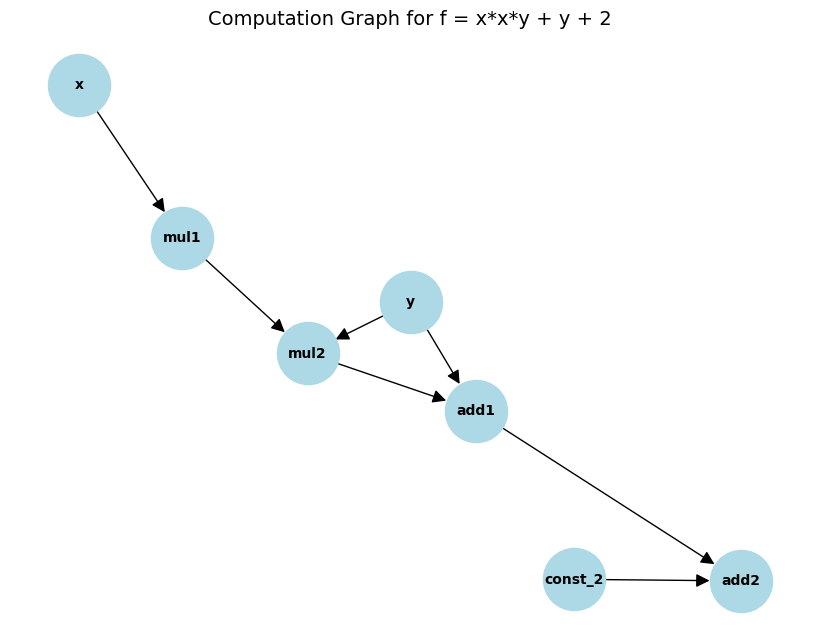

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Build a simple computation graph manually (since TF graphs are symbolic)
# Expression: f = x * x * y + y + 2

G = nx.DiGraph()

# Add nodes
G.add_node("x")
G.add_node("y")
G.add_node("const_2")
G.add_node("mul1")   # x * x
G.add_node("mul2")   # (x*x) * y
G.add_node("add1")   # + y
G.add_node("add2")   # + 2 (final output f)

# Add edges to represent dependencies
G.add_edges_from([("x", "mul1"), ("x", "mul1")])   # x*x
G.add_edges_from([("mul1", "mul2"), ("y", "mul2")])
G.add_edges_from([("mul2", "add1"), ("y", "add1")])
G.add_edges_from([("add1", "add2"), ("const_2", "add2")])

# Draw graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)  # layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Computation Graph for f = x*x*y + y + 2", fontsize=14)
plt.show()


In [20]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import subprocess
import webbrowser

# ---- STEP 1: Set the path to your TensorBoard log directory ----
log_dir = r"C:\Users\prakash\Dataset\logs"  # Change this to your folder

# ---- STEP 2: Set the port (optional, default 6006) ----
port = 6006

# ---- STEP 3: Launch TensorBoard ----
try:
    # Start TensorBoard as a subprocess
    tb_process = subprocess.Popen(
        ["tensorboard", f"--logdir={log_dir}", f"--port={port}"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
    )
    print(f"TensorBoard running on http://localhost:{port}/")
    
    # Open TensorBoard automatically in default web browser
    webbrowser.open(f"http://localhost:{port}/")
    
except FileNotFoundError:
    print("TensorBoard not found. Please install it using 'pip install tensorboard'.")


TensorBoard running on http://localhost:6006/
